In [52]:
import pandas as pd
import numpy as np
from sklearn import metrics 
from sklearn.model_selection import train_test_split 
from sklearn.utils import resample
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier 
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import itertools
processeddata=pd.read_csv(r"preprocessed_wosq.csv") #Preprocessed data without squared columns
#The issue we face with this data is unbalanced classes due to which we are not able to get an accurate response
#we deal with this using upsampling and downsampling
#The methods for both upsampling and downsampling are going to be tried and accuracy is to be checked


In [49]:
# di = {1: "extreme poverty", 2: "moderate poverty",3:"vulnerable households",4:"non vulnerable households"}
# processeddata['Target']=processeddata['Target'].map(di)
class_names=processeddata.Target.unique()
class_names=list(class_names)
col=list(processeddata.columns)
data_notnum = list(processeddata.select_dtypes(exclude=[np.number]).columns)
col=list(filter(lambda a: a not in data_notnum, col))
col.pop(-1)
x=processeddata[col]
y=processeddata.Target
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.4, random_state=1)
train = pd.concat([x_train, y_train], axis=1)
#Seperating the majority and minority classes
#in this case the majority class is 4 (non vulnerable households)
majority=train[train.Target==4]
minority1=train[train.Target==1]
minority2=train[train.Target==2]
minority3=train[train.Target==3]
minority_upsampled1=resample(minority1, replace=True, n_samples=len(majority), random_state=1)
minority_upsampled2=resample(minority2, replace=True, n_samples=len(majority), random_state=1)
minority_upsampled3=resample(minority3, replace=True, n_samples=len(majority), random_state=1)
upsampled=pd.concat([majority,minority_upsampled1,minority_upsampled2,minority_upsampled3])
print("Values before upsampling \n", train.Target.value_counts())
print("Values after upsampling\n", upsampled.Target.value_counts())

Values before upsampling 
 4    3624
2     915
3     742
1     453
Name: Target, dtype: int64
Values after upsampling
 4    3624
3    3624
2    3624
1    3624
Name: Target, dtype: int64


In [38]:
#Using Decision Trees
y_train=upsampled.Target
x_train=upsampled.drop("Target",axis=1)
upsampled = LogisticRegression(solver='liblinear').fit(x_train, y_train)
upsampled_pred = upsampled.predict(x_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [53]:
def confusion_matrix_rep(y_test,y_pred,class_names,model):
    print("F1:",metrics.f1_score(y_test, y_pred,average='macro'))
    print("precision:",metrics.precision_score(y_test, y_pred,average='macro'))
    cm=confusion_matrix(y_test, y_pred, labels=class_names)
    print("confusion matrix:\n\n" ,cm)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(cm,cmap=plt.cm.Blues)
    plt.title('Confusion matrix for '+model+" model", y=-0.5)
    fmt = 'd'

    # write the number of predictions in each bucket
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):

    # if background is dark, use a white number, and vice-versa
        plt.text(j, i, format(cm[i, j], fmt),
         horizontalalignment="center",
         color="white" if cm[i, j] > thresh else "black")
    fig.colorbar(cax)
    ax.set_xticklabels([''] + class_names)
    ax.set_yticklabels([''] + class_names)
    ax.tick_params(axis='x', rotation=90)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

F1: 0.8566346274295871
precision: 0.8610647994515208
confusion matrix:

 [[2250   47   59   24]
 [  60  546   22   15]
 [  61   18  389   11]
 [  31   10   22  258]]


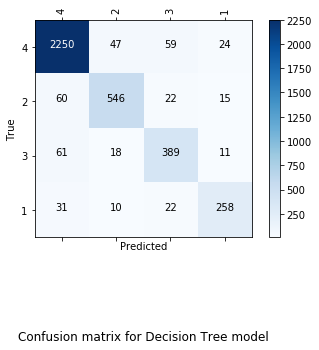

In [57]:
#Checking the values for a decision tree
clf_DT = DecisionTreeClassifier()
clf_DT = clf_DT.fit(x_train,y_train)
y_pred_DT = clf_DT.predict(x_test)
confusion_matrix_rep(y_test,y_pred_DT,class_names,"Decision Tree")